# Socio

In [1]:
import pandas as pd

df = pd.read_csv("data.csv")

C:\Users\nicol\anaconda3\envs\geo_env_2\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


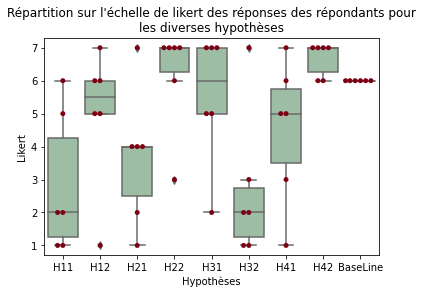

In [2]:
df.drop('Rep', axis=1)
baseLine = [6] * 6
df = df.assign(BaseLine=baseLine)
# reshape the d dataframe suitable for statsmodels package 
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['H11', 'H12','H21', 'H22','H31', 'H32','H41', 'H42', 'BaseLine'])
# replace column names
df_melt.columns = ['index', 'Hypothèses', 'Likert']

# generate a boxplot to see the data distribution by treatments. Using boxplot, we can 
# easily detect the differences between different treatments
import matplotlib.pyplot as plt
import seaborn as sns
from textwrap import wrap

plotTitle = "Répartition sur l'échelle de likert des réponses des répondants pour les diverses hypothèses"
ax = sns.boxplot(x="Hypothèses", y='Likert', data=df_melt, color='#99c2a2').set(title = "\n".join(wrap(plotTitle)))
ax = sns.swarmplot(x="Hypothèses", y="Likert", data=df_melt, color='#7d0013')
plt.savefig("BoxPlot.png", dpi=600)
plt.show()

# Hypothèse statistique

1. La moyenne considéré pour que l'hypotèse évalué sur l'échelle de Likert soit vérifiée est de 6.
2. Chaque répondant sont indépendant les uns des autres dans leur réponses.
3. L'échelle de Likert est normalement distribuée

In [3]:
# we will use bioinfokit (v1.0.3 or later) for performing tukey HSD test
# check documentation here https://github.com/reneshbedre/bioinfokit
from bioinfokit.analys import stat
# perform multiple pairwise comparison (Tukey's HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
res = stat()
res.tukey_hsd(df=df_melt, res_var='Likert', xfac_var='Hypothèses', anova_model='Likert ~ C(Hypothèses)')
summary = res.tukey_summary

In [4]:
cleanSummary = summary[summary["group2"] == 'BaseLine'].reset_index().drop('index', axis=1).sort_values(by=['p-value'])
cleanSummary

,group1,group2,Diff,Lower,Upper,q-value,p-value
5,H32,BaseLine,3.333333,-0.084678,6.751345,4.492146,0.061131
0,H11,BaseLine,3.166667,-0.251345,6.584678,4.267538,0.088719
2,H21,BaseLine,2.333333,-1.084678,5.751345,3.144502,0.411403
6,H41,BaseLine,1.500000,-1.918012,4.918012,2.021466,0.873101
1,H12,BaseLine,1.000000,-2.418012,4.418012,1.347644,0.900000
3,H22,BaseLine,0.166667,-3.251345,3.584678,0.224607,0.900000
4,H31,BaseLine,0.500000,-2.918012,3.918012,0.673822,0.900000
7,H42,BaseLine,0.666667,-2.751345,4.084678,0.898429,0.900000


Pour une confiance à 90%: si la valeur p est plus petite que 0.1, alors, on peut conclure que il y a une différence significative entre l'hyptohèse et la ligne de base. En d'autres mots, l'hypothèse est vérifier si la valeur p est plus grande que 0.1.

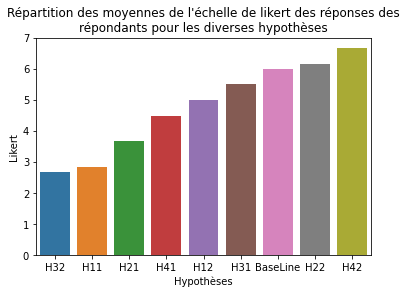

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from textwrap import wrap

df_mean = df_melt.groupby("Hypothèses", as_index = False).mean().sort_values(by=['Likert']).drop('index', axis=1)

plotTitle = "Répartition des moyennes de l'échelle de Likert des réponses des répondants pour les diverses hypothèses"
ax = sns.barplot(x="Hypothèses", y='Likert', data=df_mean, capsize=.2).set(title = "\n".join(wrap(plotTitle)))
plt.savefig("MeanPlot.png", dpi=600)
plt.show()